In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [98]:
df_la = pd.read_csv('./data/air_walk_merged_clean_LA.csv') #LA only, outside monitors only

<AxesSubplot:>

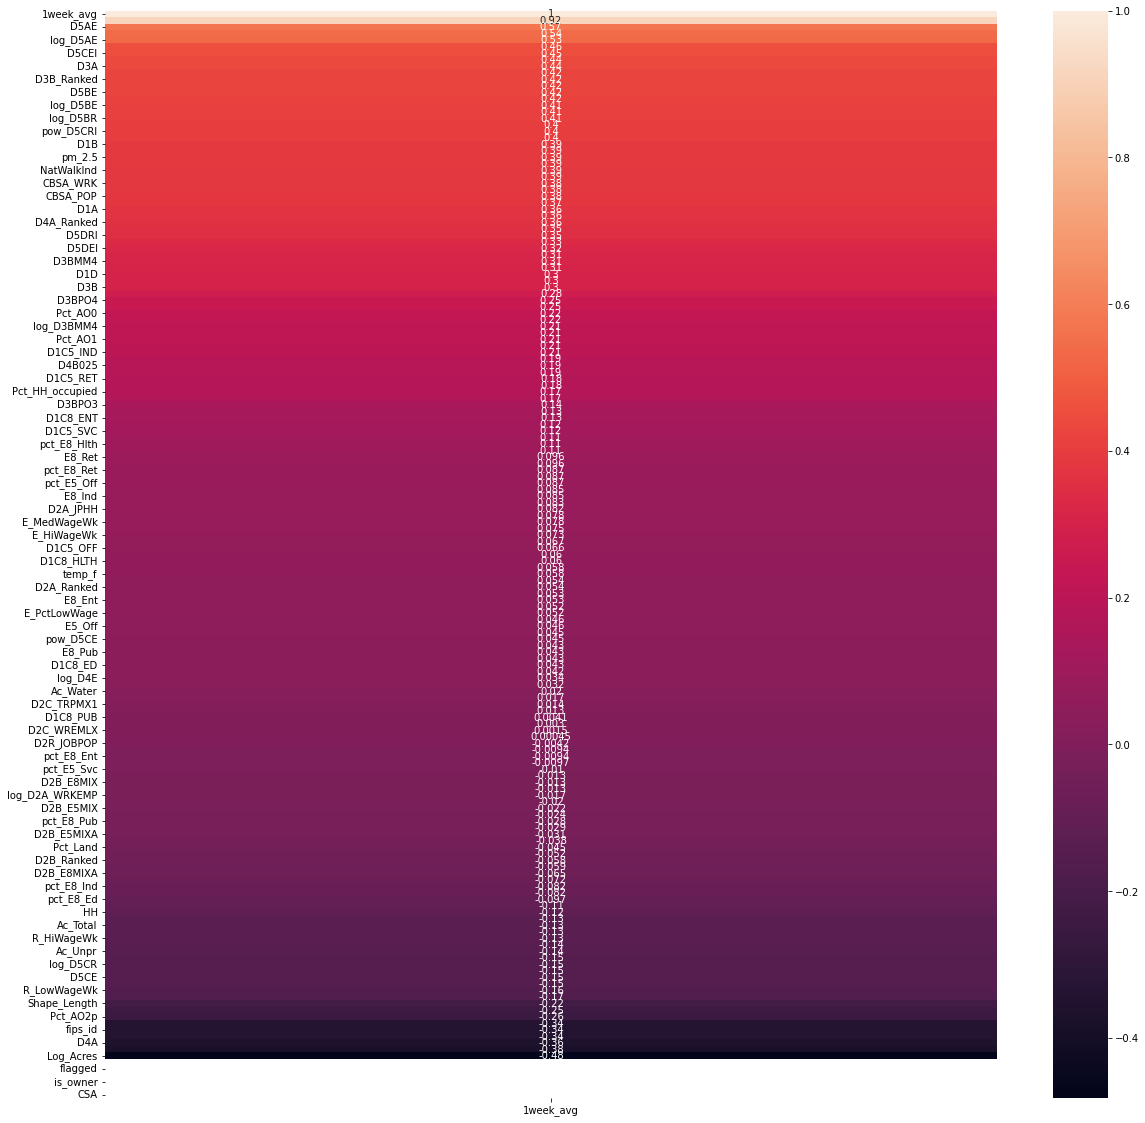

In [99]:
plt.figure(figsize=(20,20))

sns.heatmap(
        df_la.corr()[['1week_avg']].sort_values(by='1week_avg', ascending=False),
        annot=True
    )

In [100]:
#MULTIVARIATE CORRELATION
#mask created by jeff, taken from lessons
#shared by Nate during regression hack-a-thon
#mask = np.zeros_like(df_subset.corr())
#mask[np.triu_indices_from(mask)] = True

# # inspiration for heatmap parameters comes from jeff's work
#plt.figure(figsize=(18,18))
"""
sns.heatmap(
     df_subset.corr(),
     cmap='coolwarm',
     annot=True,
     mask=mask,
     vmin=-1.,
     vmax=1.,
     linewidths=.01,
     center=0
 );
 """

"\nsns.heatmap(\n     df_subset.corr(),\n     cmap='coolwarm',\n     annot=True,\n     mask=mask,\n     vmin=-1.,\n     vmax=1.,\n     linewidths=.01,\n     center=0\n );\n "

In [101]:
pd.set_option('display.max_columns', 200)

In [102]:
pd.set_option('display.max_rows', 200)

In [103]:
df_la.columns

Index(['name', 'pm_2.5', 'temp_f', 'model', 'hidden', 'flagged', 'downgraded',
       'age', 'is_owner', '1week_avg',
       ...
       'log_D5CR', 'pow_D5CRI', 'pow_D5CE', 'pow_D5CEI', 'pow_D5DR',
       'pow_D5DRI', 'pow_D5DE', 'pow_D5DEI', 'pow_D2A_Ranked',
       'log_1week_avg'],
      dtype='object', length=171)

In [104]:
print(df_la.columns, sep='\n')

Index(['name', 'pm_2.5', 'temp_f', 'model', 'hidden', 'flagged', 'downgraded',
       'age', 'is_owner', '1week_avg',
       ...
       'log_D5CR', 'pow_D5CRI', 'pow_D5CE', 'pow_D5CEI', 'pow_D5DR',
       'pow_D5DRI', 'pow_D5DE', 'pow_D5DEI', 'pow_D2A_Ranked',
       'log_1week_avg'],
      dtype='object', length=171)


In [105]:
df_la.head(2)

,name,pm_2.5,temp_f,model,hidden,flagged,downgraded,age,is_owner,1week_avg,fips_id,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,Pct_AO0,Pct_AO1,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,Low_transit_flag_dist,Low_transit_flag_freq,Pct_Water,Pct_Land,Pct_Unpr,Log_Acres,log_TotPop,Pct_HH_occupied,log_D2A_JPHH,log_D2A_WRKEMP,Pct_Workers,pct_E5_Ret,pct_E5_Off,pct_E5_Ind,pct_E5_Svc,pct_E5_Ent,pct_E8_Ret,pct_E8_off,pct_E8_Ind,pct_E8_Svc,pct_E8_Ent,pct_E8_Ed,pct_E8_Hlth,pct_E8_Pub,log_D3AAO,log_D3AMM,log_D3APO,log_D3B,log_D3BAO,log_D3BMM3,log_D3BMM4,log_D3BPO3,log_D3BPO4,log_D4A,log_D4C,log_D4D,log_D4E,log_D5AE,log_D5BR,log_D5BE,log_D5CR,pow_D5CRI,pow_D5CE,pow_D5CEI,pow_D5DR,pow_D5DRI,pow_D5DE,pow_D5DEI,pow_D2A_Ranked,log_1week_avg
0,003 FK Parking Lot,0.17,135.0,PMS5003+PMS5003+BME280,False,False,False,0,False,8.93,60710008083,6,71,808,3,348.0,"Los Angeles-Long Beach, CA",40140.0,"Riverside-San Bernardino-Ontario, CA",4518699,1439654,1749931,102.68883,0.0,102.68883,102.68883,1356,380.0,359.0,0.555,0.019499,0.306407,0.674095,448,117,136,195,0.261161,585,44,14,14,421,92,44,9,14,77,92,61,283,5,150,216,219,0.25641,3.7005,13.204942,5.696822,0.428479,0.136334,0.136334,4.099764,0.89591,0.428479,0.087643,0.136334,0.749838,0.89591,0.594028,2.755899,0.048691,9.397322,1.629526,0.559777,0.559777,0.737556,0.737556,0.682299,0.605275,0.66863,0.457875,0.602782,0.867377,0.765812,0.791213,27.206962,0.0,5.350424,21.856537,214.064958,0.0,68.556629,31.162104,186.972625,12.464842,551.2,0.0,0.0,4.0,24.929683,0.00295,87557,86344,48836,29298,0.00068,0.568342,0.000635,0.603475,0.001306,0.080022,0.00086,0.086566,16,17,19,15,16.833333,3002.787752,415575.8064,False,False,0.0,1.0,1.0,4.641394,7.213032,0.944737,0.966804,0.568611,0.330383,0.075214,0.023932,0.023932,0.719658,0.157265,0.075214,0.015385,0.023932,0.131624,0.157265,0.104274,0.483761,0.008547,3.339569,0.0,1.848522,3.129237,5.37094,0.0,4.242141,3.470789,5.236296,2.600082,1.609438,3.255388,0.002946,11.366106,10.796244,10.285309,0.000679,0.945063,0.478952,0.950749,0.514757,0.776821,0.493659,0.782951,1.319508,2.29556
1,005- FK Shelby Forest,0.00,87.0,PMS5003+PMS5003+BME280,False,False,False,1297,False,0.01,60710008083,6,71,808,3,348.0,"Los Angeles-Long Beach, CA",40140.0,"Riverside-San Bernardino-Ontario, CA",4518699,1439654,1749931,102.68883,0.0,102.68883,102.68883,1356,380.0,359.0,0.555,0.019499,0.306407,0.674095,448,117,136,195,0.261161,585,44,14,14,421,92,44,9,14,77,92,61,283,5,150,216,219,0.25641,3.7005,13.204942,5.696822,0.428479,0.136334,0.136334,4.099764,0.89591,0.428479,0.087643,0.136334,0.749838,0.89591,0.594028,2.755899,0.048691,9.397322,1.629526,0.559777,0.559777,0.737556,0.737556,0.682299,0.605275,0.66863,0.457875,0.602782,0.867377,0.765812,0.791213,27.206962,0.0,5.350424,21.856537,214.064958,0.0,68.556629,31.162104,186.972625,12.464842,551.2,0.0,0.0,4.0,24.929683,0.00295,87557,86344,48836,29298,0.00068,0.568342,0.000635,0.603475,0.001306,0.080022,0.00086,0.086566,16,17,19,15,16.833333,3002.787752,415575.8064,False,False,0.0,1.0,1.0,4.641394,7.213032,0.944737,0.966804,0.568611,0.330383,0.075214,0.023932,0.023932,0.719658,0.157265,0.075214,0.015385,0.023932,0.131624,0.157265,0.104274,0.483761,0.008547,3.339569,0.0,1.848522,3.129237,5

In [106]:
#there were more I should have dropped but I got tired of typing!

drop_cols1 = [
    'name', 'pm_2.5', 'temp_f',    'model',
    'hidden',  'downgraded', 'age',  'STATEFP',
    'COUNTYFP','TRACTCE', 'BLKGRPCE', 'CSA_Name', 'CBSA', 'CBSA_Name',  'CBSA_EMP',  
    'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'Pct_AO0', 'Pct_AO1'
    ]


In [107]:
drop_cols2 = ['Pct_AO2p','Workers',  'R_MedWageWk','R_HiWageWk', 'R_PCTLOWWAGE','TotEmp', 'E5_Ret', 'E5_Off','E5_Ind', 'E5_Svc', 'E5_Ent', 
    'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk',
    'E_PctLowWage',   'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC', 'D1C5_ENT',
    'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT', 'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB',  
    'D2A_JPHH', 'D2B_E5MIX','D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM', 'D2C_TRPMX1', 'D2C_TRPMX2']

In [108]:
drop_cols3 = ['D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX',  'D3AAO', 'D3AMM', 'D3APO',  'D3BAO', 'D3BMM3',
    'D3BPO3', 'D3BPO4',  'D4B025', 'D4B050', 'D4C', 'D4D', 'D4E', 'D5AR',  'D5BR',  'D5CR', 'D5CRI', 'D5CE',
    'D5DR',  'D5DE',  'D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked', 'NatWalkInd', 'D4A_Ranked', 'Shape_Length',  
    'Shape_Area', 'log_TotPop', 'Pct_HH_occupied', 'log_D2A_JPHH',  'pow_D5CRI', 'pow_D5CE', 'pow_D5CEI', 'pow_D5DR',
    'pow_D5DRI', 'pow_D5DE', 'pow_D5DEI', 'pow_D2A_Ranked'
]

Ignore this - still a ton of variables in the model.  Look below to see X.head()
First round for LA model keep:
 (these had a somewhat positive correlation with 1week_avg)
'D5AE', 'D5CEI', 'D3A', 'D5BE', 'log_D5BR', 'pow_D5CRI','D1B', 'CBSA_WRK', 'CBSA_POP', 'D1A',
'D5DRI', 'D5DEI', 'D3BMM4', 'D1D', 'D3B',

(these had a somewhat strong negative correlation with 1week_avg)
'CSA', 'is_owner', 'flagged', 'Log_Acres', 'D4A', 'fips_id', 'Pct_A02p', 'R_LowWageWk',

Drop next round: actually dropped up front to get a model
'D3B_Ranked', 'NatWalkInd', 'D4A_Ranked', 'Shape_Length',

Target:  '1week_avg',

In [109]:
df_la_drp1 = df_la.drop(columns=drop_cols1)


In [110]:
df_la_drp2 = df_la_drp1.drop(columns=drop_cols2)


In [111]:
df_la_drp3 = df_la_drp2.drop(columns=drop_cols3)

In [112]:
x_drop=['log_1week_avg', '1week_avg']

In [113]:
X = df_la_drp3.drop(columns=x_drop)
X.shape

(820, 57)

In [114]:
y = df_la_drp3['1week_avg']
y.shape

(820,)

In [115]:
lr = LinearRegression()

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

In [117]:
cross_val_score(lr, X_train, y_train).mean()

0.3298394339212082

In [118]:
cross_val_score(lr, X_test, y_test).mean()

-0.9810456279371301

In [119]:
lr.fit(X_train, y_train)

LinearRegression()

In [126]:
print('Train score:', lr.score(X_train, y_train))
print('Test score:', lr.score(X_test, y_test))

Train score: 0.48841698835951786
Test score: 0.44298264447969615


In [124]:
X.head()

,flagged,is_owner,fips_id,CSA,CBSA_POP,CBSA_WRK,R_LowWageWk,D1A,D1B,D1D,D3A,D3B,D3BMM4,D4A,D5AE,D5BE,D5CEI,D5DRI,D5DEI,Low_transit_flag_dist,Low_transit_flag_freq,Pct_Water,Pct_Land,Pct_Unpr,Log_Acres,log_D2A_WRKEMP,Pct_Workers,pct_E5_Ret,pct_E5_Off,pct_E5_Ind,pct_E5_Svc,pct_E5_Ent,pct_E8_Ret,pct_E8_off,pct_E8_Ind,pct_E8_Svc,pct_E8_Ent,pct_E8_Ed,pct_E8_Hlth,pct_E8_Pub,log_D3AAO,log_D3AMM,log_D3APO,log_D3B,log_D3BAO,log_D3BMM3,log_D3BMM4,log_D3BPO3,log_D3BPO4,log_D4A,log_D4C,log_D4D,log_D4E,log_D5AE,log_D5BR,log_D5BE,log_D5CR
0,False,False,60710008083,348.0,4518699,1749931,117,3.700500,13.204942,9.397322,27.206962,214.064958,31.162104,551.20,86344,29298,0.603475,0.080022,0.086566,False,False,0.0,1.0,1.000000,4.641394,0.568611,0.330383,0.075214,0.023932,0.023932,0.719658,0.157265,0.075214,0.015385,0.023932,0.131624,0.157265,0.104274,0.483761,0.008547,3.339569,0.000000,1.848522,3.129237,5.370940,0.0,4.242141,3.470789,5.236296,2.600082,1.609438,3.255388,0.002946,11.366106,10.796244,10.285309,0.000679
1,False,False,60710008083,348.0,4518699,1749931,117,3.700500,13.204942,9.397322,27.206962,214.064958,31.162104,551.20,86344,29298,0.603475,0.080022,0.086566,False,False,0.0,1.0,1.000000,4.641394,0.568611,0.330383,0.075214,0.023932,0.023932,0.719658,0.157265,0.075214,0.015385,0.023932,0.131624,0.157265,0.104274,0.483761,0.008547,3.339569,0.000000,1.848522,3.129237,5.370940,0.0,4.242141,3.470789,5.236296,2.600082,1.609438,3.255388,0.002946,11.366106,10.796244,10.285309,0.000679
2,False,False,60374309011,348.0,13262234,5825012,198,5.331445,13.566865,12.676792,27.355800,182.263862,23.016020,0.00,256737,86030,0.499301,0.099344,0.085859,False,False,0.0,1.0,1.000000,4.720523,0.707125,0.556660,0.461444,0.026928,0.116279,0.297430,0.097919,0.461444,0.026928,0.116279,0.127295,0.097919,0.104039,0.066095,0.000000,3.344832,0.922485,2.023930,3.009253,5.210927,0.0,3.850829,3.178721,4.754280,3.966247,1.845300,3.455333,0.003526,12.455811,11.683419,11.362463,0.000111
3,False,False,60374820021,348.0,13262234,5825012,104,3.175180,8.772803,12.864953,17.690950,83.242265,0.000000,0.00,366604,88627,0.712970,0.123065,0.088451,False,False,0.0,1.0,1.000000,4.991340,0.278637,0.354914,0.013418,0.042373,0.264124,0.402542,0.277542,0.013418,0.042373,0.264124,0.291667,0.277542,0.003531,0.107345,0.000000,2.928039,0.000000,0.000000,2.928039,4.433697,0.0,0.000000,0.000000,4.532285,3.131040,1.945910,3.306057,0.004669,12.812040,11.897541,11.392203,0.000172
4,False,False,60374805001,348.0,13262234,5825012,131,3.921579,10.052104,6.521984,20.122847,84.462948,17.775125,346.01,306479,486579,0.596039,0.525135,0.485613,False,False,0.0,1.0,0.993287,4.976882,1.057454,0.486092,0.395161,0.043011,0.002688,0.532258,0.026882,0.395161,0.043011,0.002688,0.370968,0.026882,0.059140,0.102151,0.000000,3.050355,0.000000,1.787792,2.781710,4.448083,0.0,3.320084,2.932533,4.214447,1.694474,2.233235,3.638025,0.005776,12.632908,13.348479,13.095157,0.000140
